<a href="https://colab.research.google.com/github/KomalSingh2/AutoMobile_Data_Prediction_Regression/blob/main/AutoData_assignment_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing some useful modules

In [ ]:
%%time
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

CPU times: user 465 ms, sys: 198 ms, total: 663 ms
Wall time: 1.25 s


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Reading CSV File

In [ ]:
auto = pd.read_csv("/content/drive/MyDrive/ML Project 2_ Automobile (2).rar (Unzipped Files)/AutoData (1).csv")
print("Dataset with rows {} and columns {}".format(auto.shape[0],auto.shape[1]))
auto.head()

Dataset with rows 205 and columns 25


,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
auto.info() # so in this datasets we have 8 float data types, 7 interger data types and 10 object type data.
# to check if there is any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [ ]:
auto.isnull().sum(axis=0) # so it's comparebly very clean data with no null values. 
# Now we will move to EDA part of the datasets.

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### EDA(Exploratory Data Analysis)

In [ ]:
auto.head() # so considering all the features we have to predict the price.

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
%%time
# here we are seperating object and numerical data types 
obj_col = []
num_col = []
for col in auto.columns:
    if auto[col].dtype=='O':
        obj_col.append(col)
    else:
        num_col.append(col)

CPU times: user 152 µs, sys: 0 ns, total: 152 µs
Wall time: 155 µs


In [ ]:
print("Object data type features ",obj_col)
print("Numerical data type features ",num_col)


Object data type features  ['make', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
Numerical data type features  ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


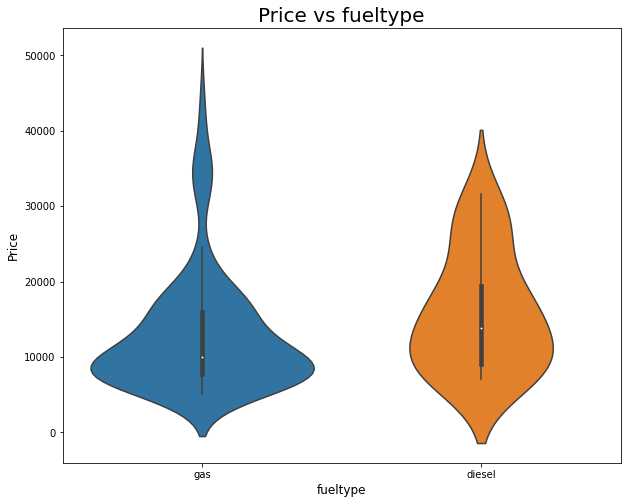

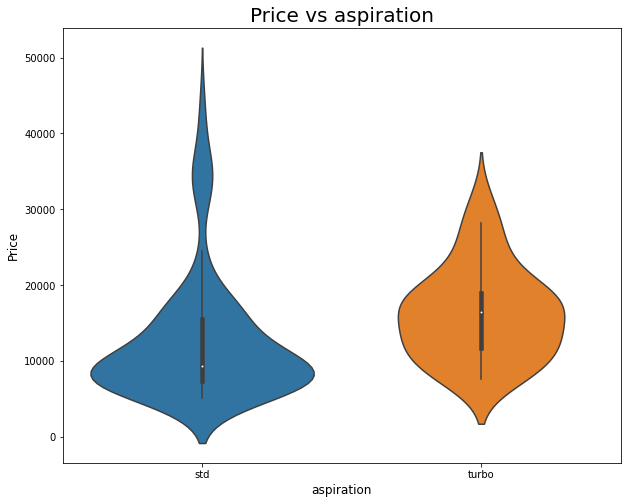

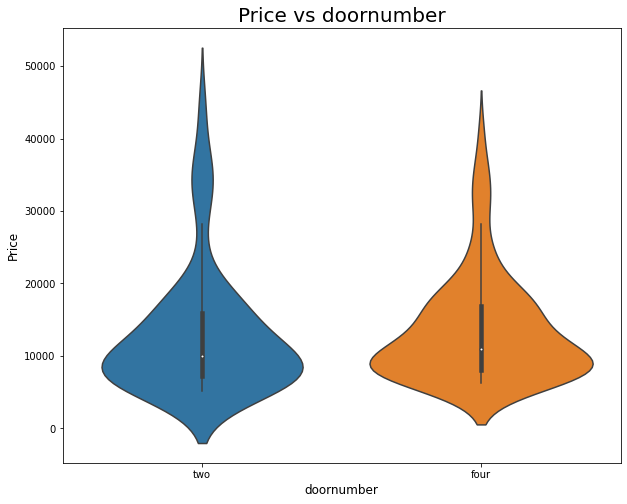

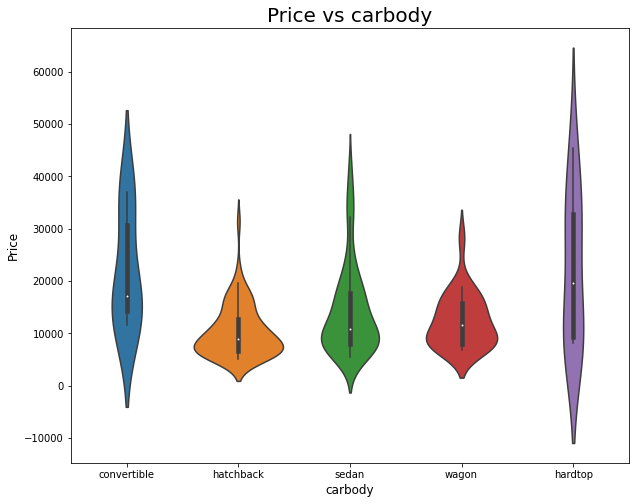

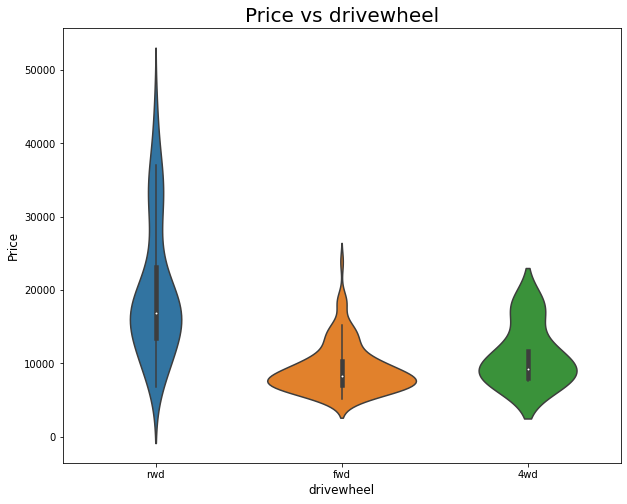

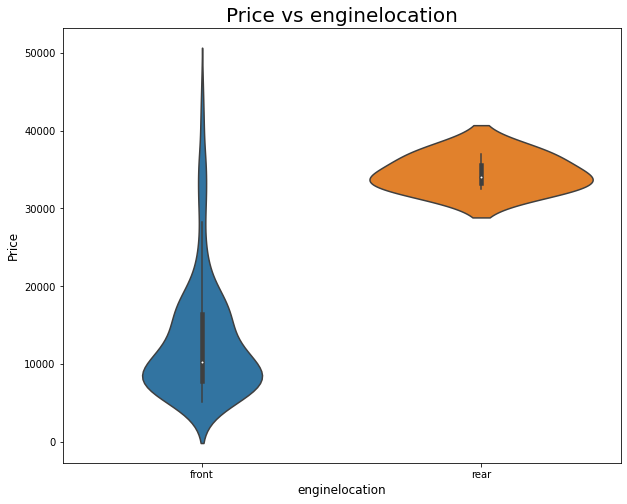

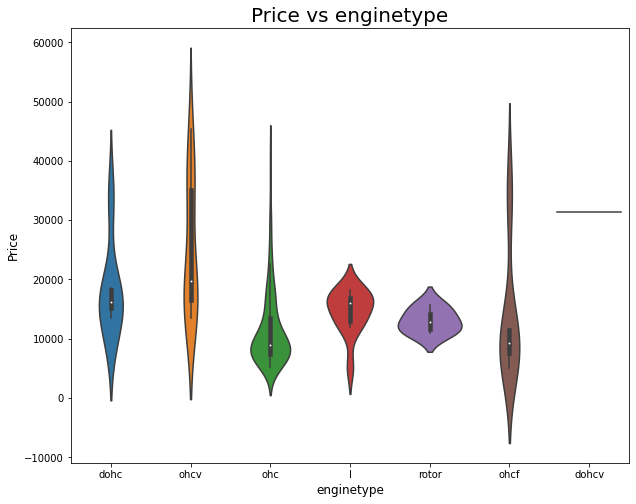

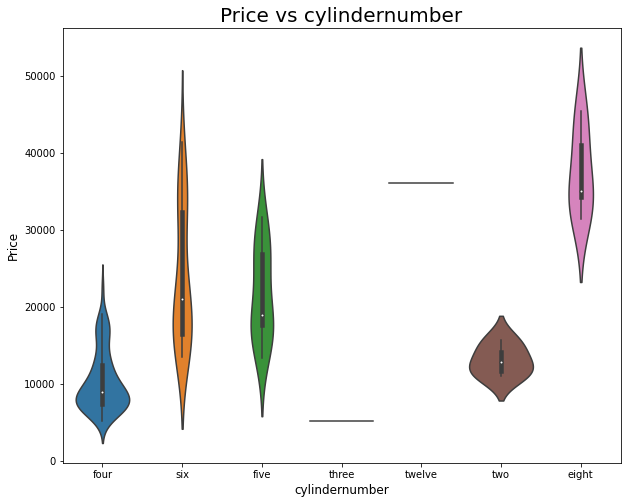

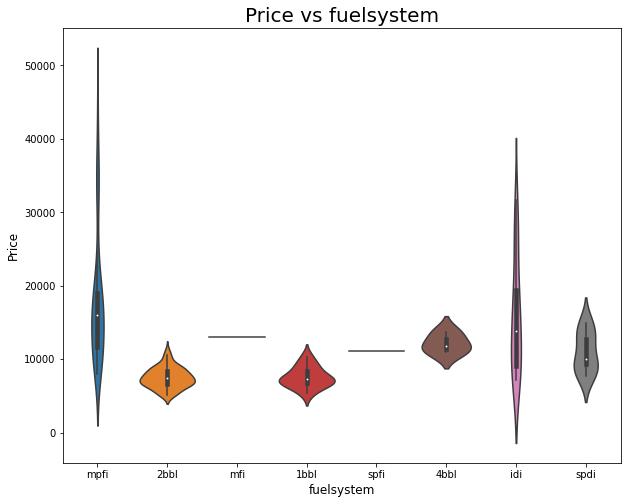

In [ ]:
from numpy import median
for col in obj_col[1:]:
    plt.figure(figsize=(10,8))
    sns.violinplot(auto[col],auto["price"])
    plt.title("Price vs "+col,fontsize=20)
    plt.xlabel(col,fontsize=12)
    plt.ylabel("Price",fontsize=12)
    plt.show()
#sns.despine()
# violin plots give best of both worlds 
# it gives boxplot and distribution of data like whether the data is skewed or not.
# if normally distributed then it's the best you can get.
# you can also use barplots in this case.

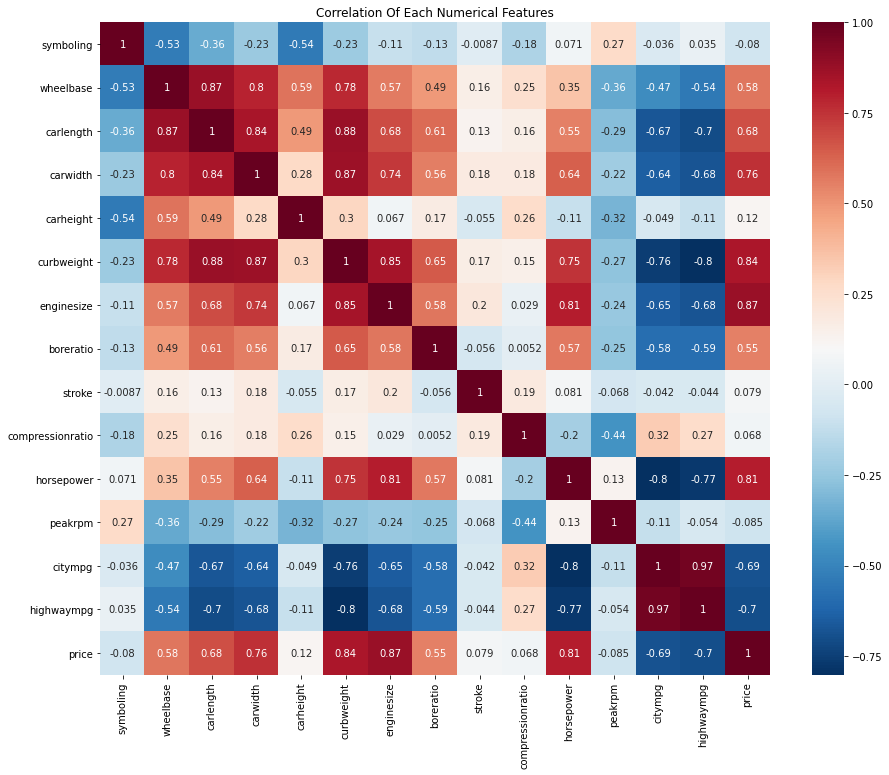

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(auto.corr(),annot=True,cmap='RdBu_r')
plt.title("Correlation Of Each Numerical Features")
plt.show()

1. There is certain group of features which is highly correlated i.e multicollinearity exist.
2. One cluster having high correlation between them is wheelbase,carlength,carwidth if you think mathematically the base is nothing but lenth*width.
3. Second Cluster having high correlation between them is enginesize,horsepower,curbweightand citympg(miles per gallon) if you think as enginesize increases horsepower also increases.And if engine is large enough then it's automatically goinf to increase the total mass of body.


<Figure size 720x576 with 0 Axes>

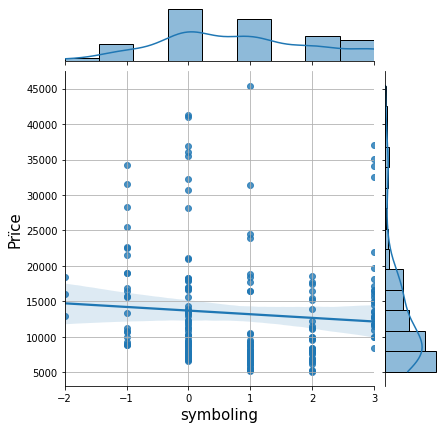

<Figure size 720x576 with 0 Axes>

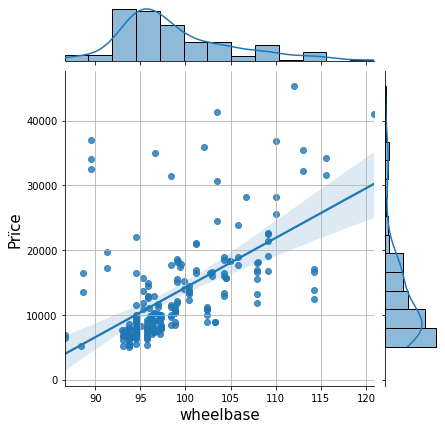

<Figure size 720x576 with 0 Axes>

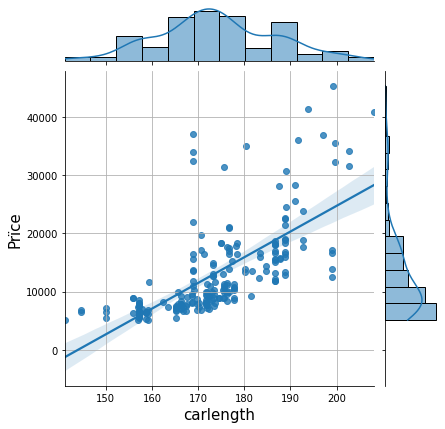

<Figure size 720x576 with 0 Axes>

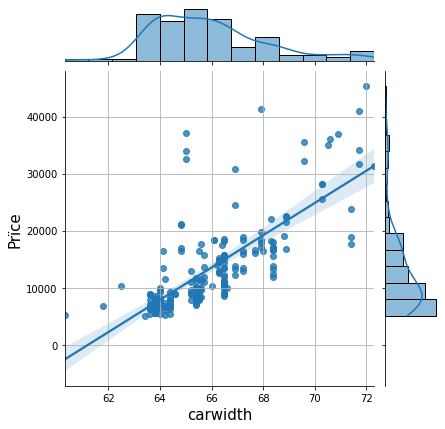

<Figure size 720x576 with 0 Axes>

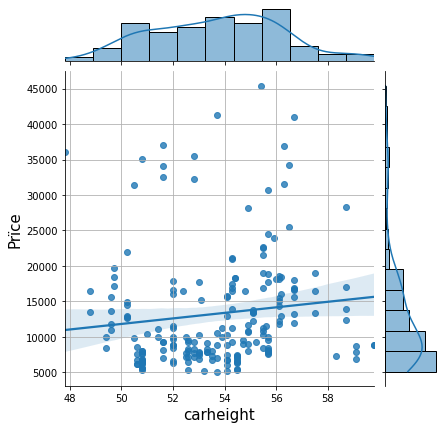

<Figure size 720x576 with 0 Axes>

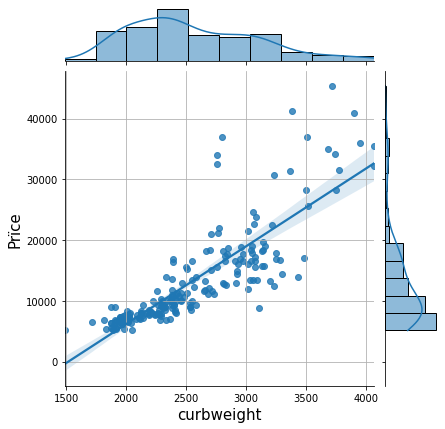

<Figure size 720x576 with 0 Axes>

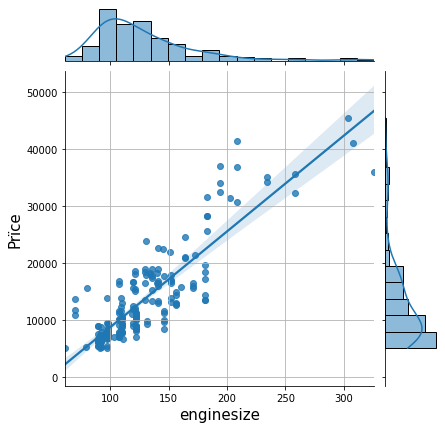

<Figure size 720x576 with 0 Axes>

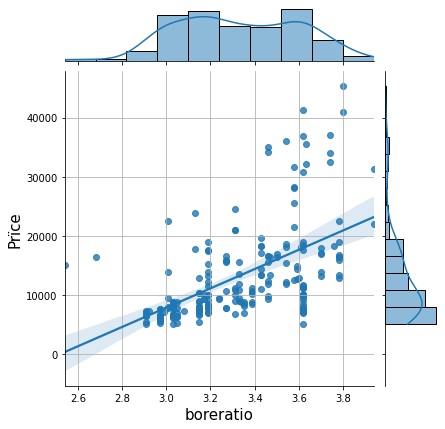

<Figure size 720x576 with 0 Axes>

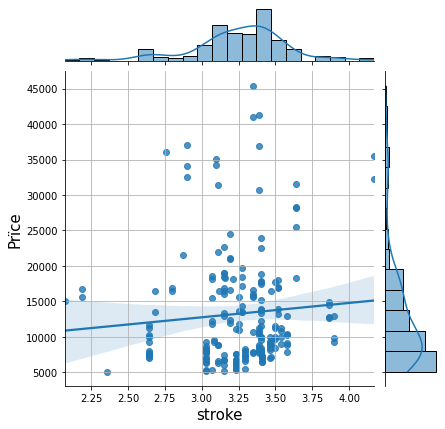

<Figure size 720x576 with 0 Axes>

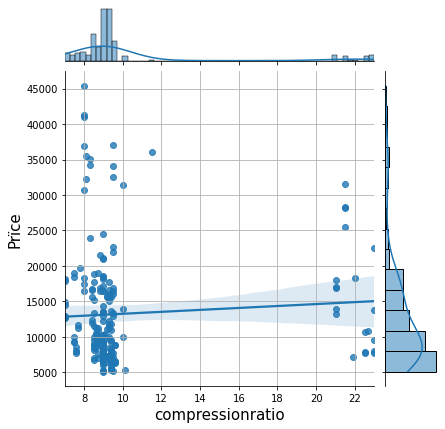

<Figure size 720x576 with 0 Axes>

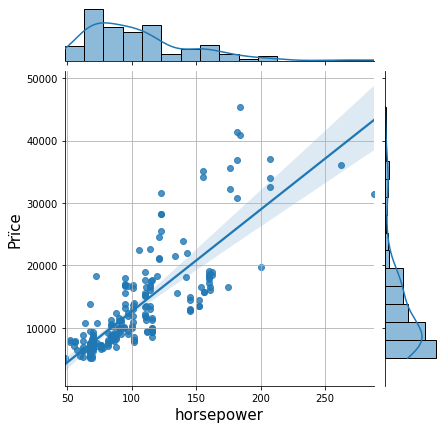

<Figure size 720x576 with 0 Axes>

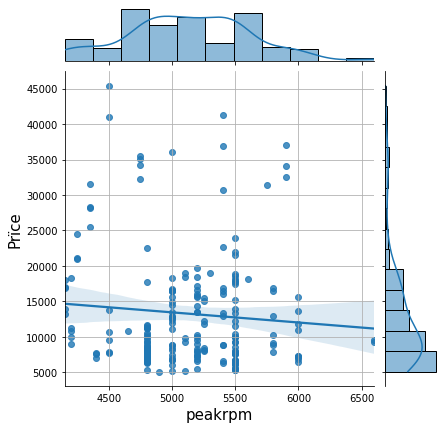

<Figure size 720x576 with 0 Axes>

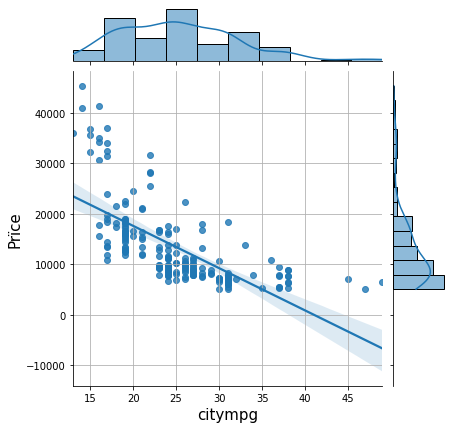

<Figure size 720x576 with 0 Axes>

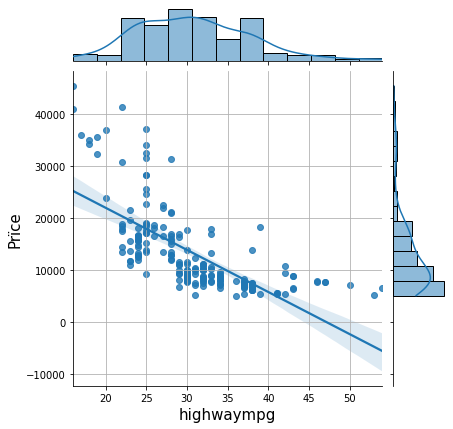

In [ ]:
for col in num_col[:-1]:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = auto[col],y = auto["price"],kind='reg')
    plt.xlabel(col,fontsize = 15)
    plt.ylabel("Prïce",fontsize = 15)
    plt.grid()
    plt.show()

####  From above we can see only using one features i.e enginesize we can get r2_score of 0.80. This features we will be using in coming models.

### Split the dataset using 80:20 ratio

In [ ]:
from sklearn.model_selection import train_test_split
X_tr,X_ts,y_tr,y_ts = train_test_split(auto.drop(["price"],axis=1),auto["price"],test_size = 0.2,random_state=42)
print("Train Data shape ",X_tr.shape)
#X_tr.head()
print("Test Data shape ",X_ts.shape)
#X_ts.head()

Train Data shape  (164, 24)
Test Data shape  (41, 24)


### One Hot Encoding of Categorical Features

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False,handle_unknown="ignore")
X_tr_obj = ohe.fit_transform(X_tr[obj_col])
X_ts_obj = ohe.transform(X_ts[obj_col])
print(X_tr_obj.shape)
print(X_ts_obj.shape)

(164, 161)
(41, 161)


In [ ]:
features = ohe.get_feature_names().tolist()

In [ ]:
X_tr_obj = pd.DataFrame(X_tr_obj,columns= features)
X_ts_obj = pd.DataFrame(X_ts_obj,columns= features)

In [ ]:
auto["make"].value_counts()

toyota corolla              6
toyota corona               6
peugeot 504                 6
subaru dl                   4
mitsubishi mirage g4        3
                           ..
buick century luxus (sw)    1
bmw x4                      1
plymouth cricket            1
volvo 245                   1
toyota corona mark ii       1
Name: make, Length: 147, dtype: int64

In [ ]:
X_tr_obj["x0_Nissan versa"]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
159    0.0
160    0.0
161    0.0
162    0.0
163    0.0
Name: x0_Nissan versa, Length: 164, dtype: float64

### Min-Max Scaling of Numerical Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X_tr = min_max.fit_transform(X_tr[num_col[:-1]])
X_ts = min_max.transform(X_ts[num_col[:-1]])
print(X_tr.shape)
print(X_ts.shape)

(164, 14)
(41, 14)


In [ ]:
X_tr = pd.DataFrame(X_tr,columns=num_col[:-1])
X_ts = pd.DataFrame(X_ts,columns=num_col[:-1])

In [ ]:
X_tr = pd.concat([X_tr_obj,X_tr[num_col[:-1]]],axis=1)
X_ts = pd.concat([X_ts_obj,X_ts[num_col[:-1]]],axis=1)
print(X_tr.shape)
print(X_ts.shape)

(164, 175)
(41, 175)


In [ ]:
X_tr.head()

,x0_Nissan versa,x0_alfa-romero Quadrifoglio,x0_alfa-romero giulia,x0_alfa-romero stelvio,x0_audi 100 ls,x0_audi 100ls,x0_audi 4000,x0_audi 5000,x0_audi fox,x0_bmw 320i,x0_bmw x1,x0_bmw x3,x0_bmw z4,x0_buick opel isuzu deluxe,x0_buick regal sport coupe (turbo),x0_buick skyhawk,x0_buick skylark,x0_chevrolet monte carlo,x0_chevrolet vega 2300,x0_dodge challenger se,x0_dodge colt (sw),x0_dodge coronet custom,x0_dodge coronet custom (sw),x0_dodge d200,x0_dodge dart custom,x0_dodge monaco (sw),x0_dodge rampage,x0_honda accord,x0_honda accord cvcc,x0_honda accord lx,x0_honda civic,x0_honda civic (auto),x0_honda civic 1300,x0_honda civic 1500 gl,x0_honda civic cvcc,x0_honda prelude,x0_isuzu D-Max,x0_isuzu MU-X,x0_jaguar xf,x0_jaguar xj,...,x5_4wd,x5_fwd,x5_rwd,x6_front,x6_rear,x7_dohc,x7_dohcv,x7_l,x7_ohc,x7_ohcf,x7_ohcv,x7_rotor,x8_eight,x8_five,x8_four,x8_six,x8_twelve,x8_two,x9_1bbl,x9_2bbl,x9_4bbl,x9_idi,x9_mfi,x9_mpfi,x9_spdi,x9_spfi,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.4,0.631034,0.524138,0.409524,0.550000,0.392078,0.250000,0.635714,0.747619,0.9375,0.084746,0.020408,0.5625,0.676471
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.4,0.734483,0.725862,0.628571,0.741667,0.558968,0.195312,0.657143,0.057143,0.0875,0.182203,0.346939,0.1875,0.235294
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.313793,0.432759,0.171429,0.941667,0.205162,0.085938,0.364286,0.457143,0.1250,0.042373,0.265306,0.5625,0.617647
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.272414,0.356897,0.190476,0.558333,0.067646,0.105469,0.435714,0.580952,0.1500,0.072034,0.428571,0.5625,0.617647
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.341379,0.394828,0.323810,0.458333,0.209168,0.156250,0.435714,0.719048,0.1250,0.144068,0.673469,0.4375,0.500000


### Linear Regression

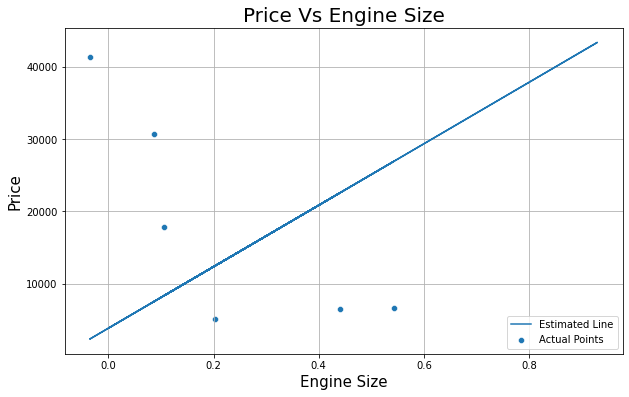

R2 Score using engine size features is --> 0.8040958796678975


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score

# calculation part
model = LinearRegression()
model.fit(np.array(X_tr["enginesize"]).reshape(-1,1),np.array(y_tr).reshape(-1,1))
y_pred = model.predict(np.array(X_ts["enginesize"]).reshape(-1,1))


# plotting part
plt.figure(figsize=(10,6))
sns.scatterplot(x = X_ts["enginesize"],y = y_ts,label = "Actual Points",palette="set1")
plt.plot(X_ts["enginesize"],y_pred,label = "Estimated Line")
plt.title("Price Vs Engine Size",fontsize=20)
plt.xlabel("Engine Size",fontsize = 15)
plt.ylabel("Price",fontsize = 15)
plt.legend()
plt.grid()
plt.show()
print("R2 Score using engine size features is -->",r2_score(y_ts,y_pred))

1. So from above eda and visualizations we are aware that enginesize is the most important numerical features which contribute more in predicting the target values.
2. So we have used only engine size features to predict the r2 score which is 0.804

## Multiple Regression Models

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.feature_selection import RFE

## Result Based On RFE(Reverse Features Selection)

#### Categorical Features

In [ ]:
#selecting top 10 features 
lr = LinearRegression(n_jobs=-1)
rfe = RFE(estimator=lr,n_features_to_select=10)
rfe.fit(X_tr,y_tr)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [ ]:
selected_feat = X_tr.columns[rfe.ranking_==1]

In [ ]:
selected_feat

Index(['x2_turbo', 'x3_two', 'x5_4wd', 'x5_fwd', 'x5_rwd', 'x7_rotor',
       'x8_eight', 'x8_four', 'x8_six', 'x8_twelve'],
      dtype='object')

In [ ]:
X_tr_cat = sm.add_constant(X_tr[selected_feat]) # adding constant 

In [ ]:
model = sm.OLS(np.array(y_tr),X_tr_cat).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     55.95
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           4.38e-44
Time:                        12:11:29   Log-Likelihood:                -1581.8
No. Observations:                 164   AIC:                             3184.
Df Residuals:                     154   BIC:                             3215.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.573e+04   1227.368     12.819      0.000    1.33e+04    1.82e+04
x2_turbo    2969.2821    823.122      3.607      0.000    1343.215    4595.349
x3_two     -1485.9001    625.490     -2.376      0.019   -2721.548    -250.252
x5_4wd      3001.6776   1220.467      2.459      0.015     590.659    5412.696
x5_fwd      3406.8547    676.698      5.035      0.000    2070.046    4743.663
x5_rwd      9324.5779    793.020     11.758      0.000    7757.976    1.09e+04
x7_rotor   -9860.1215   2868.704     -3.437      0.001   -1.55e+04   -4193.031
x8_eight    1.257e+04   2620.624      4.795      0.000    7389.849    1.77e+04
x8_four    -1.022e+04   1636.352     -6.248      0.000   -1.35e+04   -6991.629
x8_six      -966.6440   1916.126     -0.504      0.615   -4751.929    2818.641
x8_twelve   1.243e+04   4259.840      2.918      0.004    4012.948    2.08e+04
==============================================================================
Omnibus:                       37.758   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.050
Skew:                           1.081   Prob(JB):                     3.73e-16
Kurtosis:                       5.393   Cond. No.                     5.37e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.39e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
X_tr_obj = X_tr_obj[["x6_rear","x7_dohc","x7_l","x7_ohc","x8_eight","x8_twelve","x8_four"]]

#### Numerical Features

In [ ]:
lr = LinearRegression(n_jobs=-1)
rfe = RFE(estimator=lr,n_features_to_select=5)
rfe.fit(X_tr[num_col[:-1]],y_tr)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1,
                               normalize=False),
    n_features_to_select=5, step=1, verbose=0)

In [ ]:
selected_feat = X_tr[num_col[:-1]].columns[rfe.ranking_==1]

In [ ]:
selected_feat

Index(['carwidth', 'enginesize', 'stroke', 'peakrpm', 'citympg'], dtype='object')

In [ ]:
X_tr_num = sm.add_constant(X_tr[selected_feat])

In [ ]:
model = sm.OLS(np.array(y_tr),X_tr_num).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     156.5
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           2.60e-59
Time:                        12:12:06   Log-Likelihood:                -1554.5
No. Observations:                 164   AIC:                             3121.
Df Residuals:                     158   BIC:                             3140.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4918.1336   1811.128      2.716      0.007    1340.990    8495.277
carwidth    9712.0180   1886.509      5.148      0.000    5985.989    1.34e+04
enginesize  3.311e+04   2577.475     12.846      0.000     2.8e+04    3.82e+04
stroke     -6043.3348   1718.884     -3.516      0.001   -9438.289   -2648.381
peakrpm     5176.8697   1406.674      3.680      0.000    2398.559    7955.181
citympg    -3962.6859   2002.718     -1.979      0.050   -7918.239      -7.133
==============================================================================
Omnibus:                       17.992   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.463
Skew:                           0.558   Prob(JB):                     2.43e-07
Kurtosis:                       4.792   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_tr_main = pd.concat([X_tr_obj,X_tr_num],axis=1)
X_tr_main.head()

,x6_rear,x7_dohc,x7_l,x7_ohc,x8_eight,x8_twelve,x8_four,const,carwidth,enginesize,stroke,peakrpm,citympg
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.409524,0.250000,0.747619,0.020408,0.5625
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.628571,0.195312,0.057143,0.346939,0.1875
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.171429,0.085938,0.457143,0.265306,0.5625
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.190476,0.105469,0.580952,0.428571,0.5625
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.323810,0.156250,0.719048,0.673469,0.4375


In [ ]:
model = sm.OLS(np.array(y_tr),X_tr_main).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     110.2
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           2.94e-68
Time:                        12:12:16   Log-Likelihood:                -1514.0
No. Observations:                 164   AIC:                             3054.
Df Residuals:                     151   BIC:                             3094.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x6_rear     1.452e+04   1997.756      7.270      0.000    1.06e+04    1.85e+04
x7_dohc     3182.1418   1070.833      2.972      0.003    1066.392    5297.892
x7_l        2067.5677   1243.308      1.663      0.098    -388.958    4524.094
x7_ohc      3428.4916    836.952      4.096      0.000    1774.842    5082.141
x8_eight    5974.4471   1840.737      3.246      0.001    2337.521    9611.373
x8_twelve  -2364.1074   3466.609     -0.682      0.496   -9213.430    4485.215
x8_four    -2993.7096    811.007     -3.691      0.000   -4596.097   -1391.322
const       8154.2445   1749.682      4.660      0.000    4697.226    1.16e+04
carwidth    1.136e+04   1855.541      6.125      0.000    7698.468     1.5e+04
enginesize  2.249e+04   3406.156      6.603      0.000    1.58e+04    2.92e+04
stroke     -6521.9012   1708.811     -3.817      0.000   -9898.169   -3145.634
peakrpm      972.2755   1345.026      0.723      0.471   -1685.226    3629.777
citympg    -4994.2031   1755.643     -2.845      0.005   -8463.002   -1525.405
==============================================================================
Omnibus:                        4.579   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                4.121
Skew:                           0.332   Prob(JB):                        0.127
Kurtosis:                       3.403   Cond. No.                         42.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
top_features = X_tr_main[["x6_rear","x7_ohc","x8_four","enginesize","stroke"]]

In [ ]:
lr = LinearRegression(n_jobs=-1)
lr.fit(top_features,y_tr)
X_ts_main = X_ts[["x6_rear","x7_ohc","x8_four","enginesize","stroke"]]
y_pred = lr.predict(X_ts_main)
y_pred_tr = lr.predict(top_features)
print("r2 score on test data is --> ",r2_score(y_ts,y_pred))
print("r2 score on train data is --> ",r2_score(y_tr,y_pred_tr))

r2 score on test data is -->  0.8570274288902666
r2 score on train data is -->  0.8158855231693215


## Conclusion

1. We have selected some categorical features and numerical features and concat them to get r2 scores of 0.85 on test data.
2. But as we have seen in above code snippets that we only used enginesize features and got 0.80 r2 scores.
3. We can also try to calculate adjusted r2 score.
4. So in above codes we have selected features based on p-values, as p-values approaches zero we can say that 
5. Prob(features contribute more | null hypothesis is true)<0.05 where 0.05 is statistical significant value.
6. where our h0(null hypothesis) is that there is no correlation between target variable and selected feature.